In [3]:
import os
import pandas as pd
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Load metadata ----
data_dir = r"D:\3\Hoc May\BTL\traffic_sign_project (1)\data\raw_gtsrb"
train_csv = pd.read_csv(os.path.join(data_dir, "Train.csv"))
test_csv = pd.read_csv(os.path.join(data_dir, "Test.csv"))

print("Số ảnh train:", len(train_csv))
print("Số ảnh test:", len(test_csv))


Số ảnh train: 39209
Số ảnh test: 12630


In [4]:
# ---- 2. Hàm trích xuất đặc trưng HOG ----
def extract_hog_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # chuyển grayscale
    img = cv2.resize(img, (64, 64))               # resize về 64x64
    features, _ = hog(img, orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      block_norm='L2-Hys',
                      visualize=True)
    return features

In [5]:
# ---- 3. Trích đặc trưng cho tập train ----
X_train, y_train = [], []
for i, row in train_csv.iterrows():
    img_path = os.path.join(data_dir, row['Path'])
    X_train.append(extract_hog_features(img_path))
    y_train.append(int(row['ClassId']))

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)


X_train shape: (39209, 1764)


In [6]:
# ---- 4. Trích đặc trưng cho tập test ----
X_test, y_test = [], []
for i, row in test_csv.iterrows():
    img_path = os.path.join(data_dir, row['Path'])
    X_test.append(extract_hog_features(img_path))
    y_test.append(int(row['ClassId']))

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)



X_test shape: (12630, 1764)


Training Linear SVM...
Accuracy: 0.9179730799683293

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.78        60
           1       0.87      0.87      0.87       720
           2       0.83      0.88      0.85       750
           3       0.85      0.82      0.84       450
           4       0.95      0.94      0.95       660
           5       0.78      0.81      0.80       630
           6       0.90      0.77      0.83       150
           7       0.89      0.91      0.90       450
           8       0.88      0.86      0.87       450
           9       0.95      0.98      0.96       480
          10       0.97      0.98      0.97       660
          11       0.89      0.89      0.89       420
          12       0.99      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       0.98      0.97      0.98       270
          15       0.94      0.98      0.96       210
     

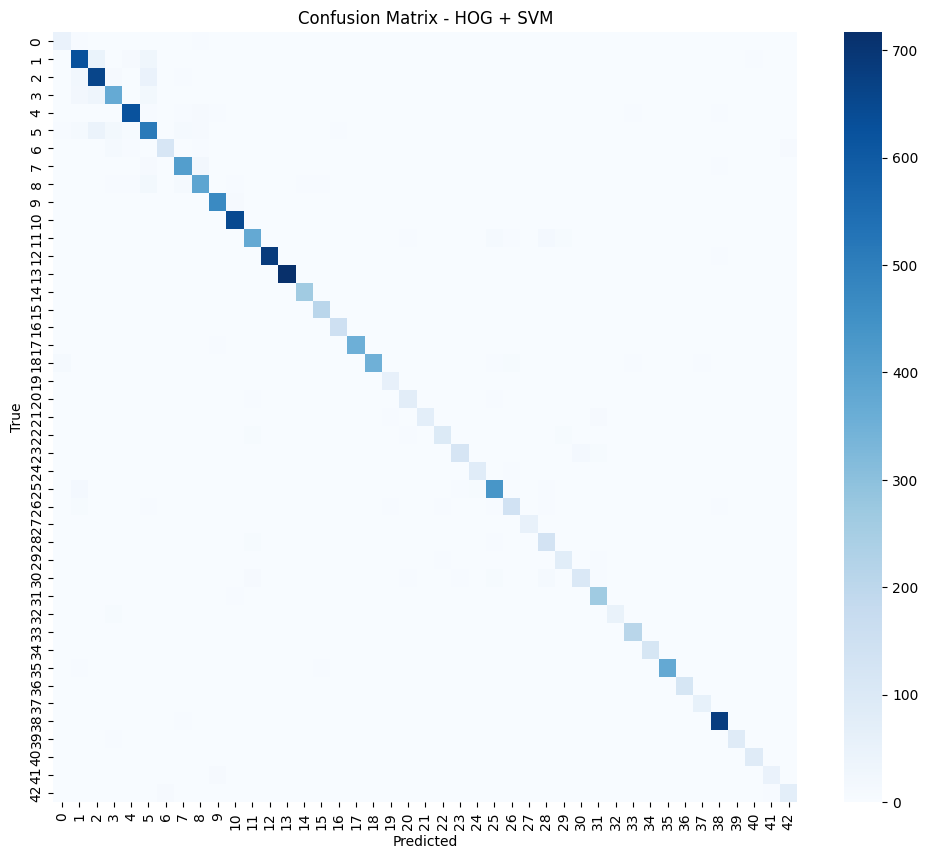

In [7]:
print("Training Linear SVM...")
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)

# ---- 6. Đánh giá ----
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - HOG + SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()